# SVD and oscillations notebook
This notebook gives an example on how to remove noise with SVD and then look for oscillations in the preprocessed data using the Singular Value Decomposition algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.jet()
from struvana.analysis import OscillationAnalysis

<Figure size 432x288 with 0 Axes>

`load_file` should point to the numpy archive produced by the `struvana.preprocess.RawDataManager` class. In particular it is suggested to analyze the file produced after the dechirping and smoothing. 

In [2]:
load_file = "/Users/lorenzo/Documents/PhD/StratusUV/Experiments/uridine/processed_data/d220527_01_pseudo_294_magic_dechirp.npz"

In [3]:
fourier = OscillationAnalysis(load_file)

Let's plot to check the file is the one we expect:

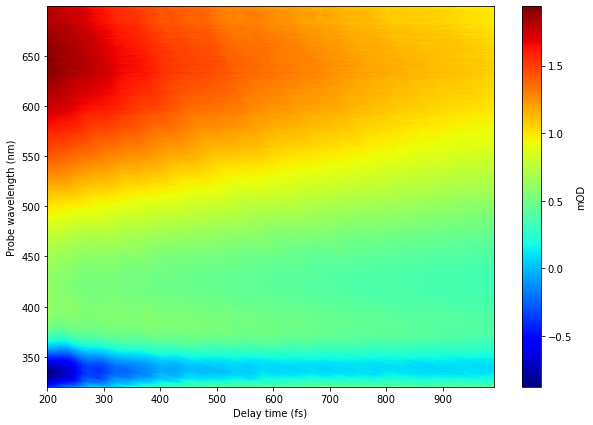

In [12]:
fourier.plot_map(figsize=(10,7),  delayRange=(200,1000), mOD=True)

## SVD 
We can use the function `plot_svd` to check how the SVD decomposition will work on our dataset.

Using just the `component` argument we can just plot the single component of the decomposition (numeration start from zero!). I used `delayRange` to zoom in the range where oscillations are expected.

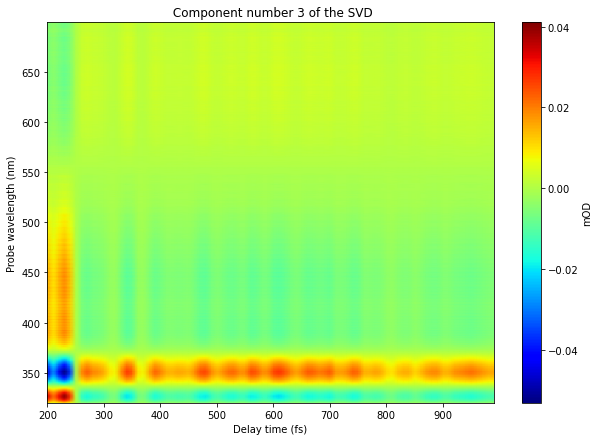

In [6]:
fourier.plot_svd(component=3, delayRange=(200,1000), figsize=(10,7), mOD=True)

Using the `until_component` argument alone we can sum the component from zero until this component and show the result.
In the example below you can see that only slow and fast dynamics is kept and noise is removed. 

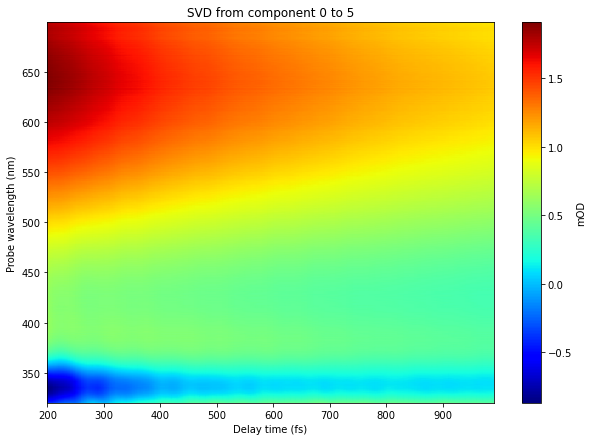

In [7]:
fourier.plot_svd(until_component=5, delayRange=(200,1000), figsize=(10,7), mOD=True)

Using the `from_component` argument alone we can sum the component from this component until the last one and show the result.
In the example below we can see that from component number 6 onward there is only noise.

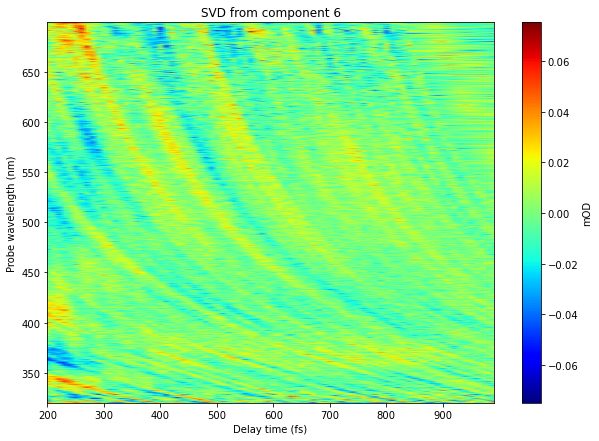

In [8]:
fourier.plot_svd(from_component=6,  delayRange=(200,1000), figsize=(10,7), mOD=True)

Using both `from_component` and `until_component` we can sum the components between this range.

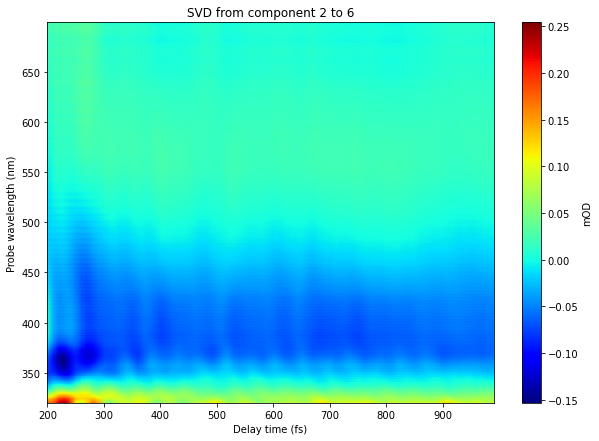

In [10]:
fourier.plot_svd(from_component=2, until_component=6, delayRange=(200,1000), figsize=(10,7), mOD=True)

Once the function `plot_svd` has been run we can also access the svd decomposition and store for further use:

In [11]:
svd = fourier.svd

## Oscillations from SVD

After the previous analysis of the SVD components we can state that keeping until component number five retains only the dynamics and discard the noise. We can then apply the SVD and look for oscillations, this further step is done smoothing the SVD map to keep only slow dynamics and subtracting it to the original SVD map in order to higlight fast dynamics.

This is performed by the `get_oscillations_svd` function. An example:

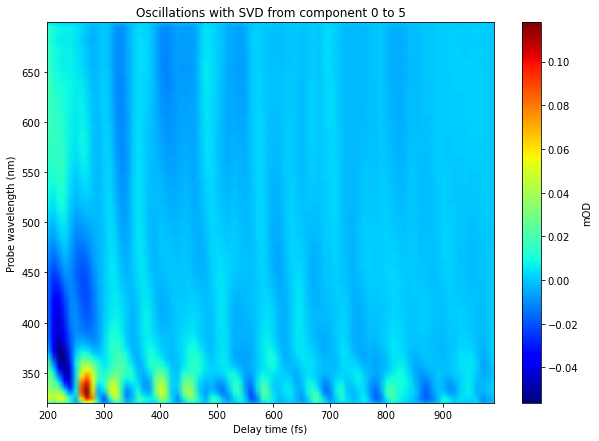

In [13]:
fourier.get_oscillations_svd(until_component=5, smoothWindowDelayFS=150, delayRange=(200,1000), figsize=(10,7), mOD=True)

Note that the arguments of `get_oscillations_svd` are the same of `plot_svd` (explained before). Furtheremore there is `smoothWindowDelaysFS` that is the size of the smoothing window in femtosecond used to smooth the map before the subtraciton.

Finally we can access the oscillations and retain for further use:

In [14]:
oscillations = fourier.oscillations

Or, we can compute the fourier transform of the data to check the frequency of the oscillations. The arguments are used to restrict the fourier transform in that range of delays.

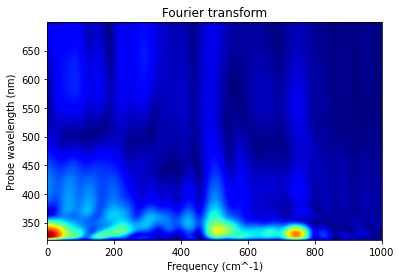

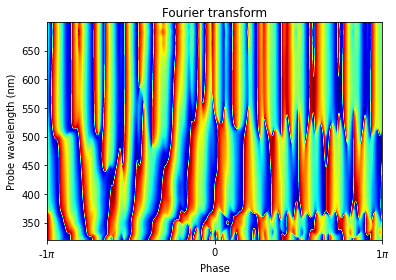

In [15]:
fourier.fourier_transform(start_delay=200, end_delay=800)